In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from skimage.feature import hog

<font  style="font-size: 4rem; color: #1abc9c"> Model Combination : </font> 
<font  style="font-size: 4rem; color: #1abc9c"> Random Forests, Adaboost </font>

In Scikit-learn, the Random Forests methods are implemented via the <code>RandomForestClassifier</code> and <code>RandomForestCRegressor</code> class. Main parameters are:

    n_estimators: the number of trees in the forest.

    max_features : the number of attributes randomly drawn.

    oob_score : boolean. Estimate or not the generalization error OOB (Out of Bag).

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# <font color="#1E90FF">Exercise 1. Random Forest exploration</font>


In this exercise, we will take in hand the implementation of the RF. The dataset is based on "Bank Marketing" UCI dataset. The binary classification goal is to predict if the client will subscribe a bank term deposit (variable y).

Input variables:

    1 - age (numeric)
    2 - job : type of job (categorical: "admin.","bluecollar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    3 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    4 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    5 - cons.price.idx: consumer price index - monthly indicator (numeric) 
    6 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
    7 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    8 - nr.employed: number of employees - quarterly indicator (numeric)


## <font color="#9400D3">1. Data processing </font>

In [4]:
# Load data
bank_data = pd.read_csv('./data/bank-additional-modified.csv', sep=';')
bank_data['y'] = bank_data['y'].map({'no':0,'yes':1})
print(pd.value_counts(bank_data.y))
bank_data.head()


y
0    3668
1     451
Name: count, dtype: int64


/var/folders/7n/dhxfgyr53fvg58mnrjg1mkc40000gn/T/ipykernel_56704/3861843901.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(bank_data.y))


,age,job,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,basic.9y,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,high.school,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,high.school,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,basic.9y,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,university.degree,-0.1,93.200,-42.0,4.191,5195.8,0


<font color="red">**Question 1:**</font> Describe the dataset : number of samples, features, classes, class distribution


Attributes should be numeric. We employ the <code>OrdinalEncoder</code> preprocessing method to transform the categorical attributes.

<font color="red">**Question 2:**</font> Explain the effect of this encoding.

In [5]:
# Data preprocessing
oenc=OrdinalEncoder()
bank_data[["job","education"]] = oenc.fit_transform(bank_data[["job","education"]])
bank_data.head()

,age,job,education,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1.0,2.0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7.0,3.0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7.0,3.0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7.0,2.0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0.0,6.0,-0.1,93.200,-42.0,4.191,5195.8,0


## <font color="#9400D3">2. RF classifier </font>

/Users/tomchauvel/Documents/GitHub/2024-2025-ESIR-AA/.venv/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


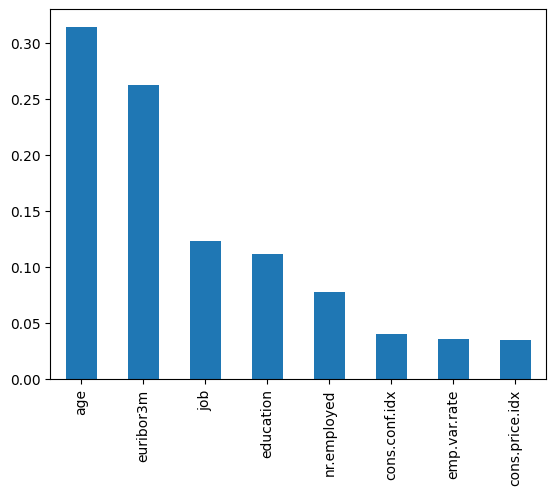

In [6]:
# Dataset split into train/test set
bank_train, bank_test = train_test_split(bank_data, test_size = 0.3, random_state = 50)

# Learn a RF classifier
r_f = RandomForestClassifier(n_estimators=15, random_state=0, oob_score=True)
r_f.fit(bank_train.iloc[:,:-1],bank_train.y) 


# Feature importance
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(r_f.feature_importances_, index=bank_train.columns[:-1]).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

<font color="red">**Question 3:**</font> How many trees are used in the ensemble?

<font color="red">**Question 4:**</font> How many features are consider when looking for the best split?

<font color="red">**Question 5:**</font> Recall how the importance of variables is determined.

<font color="blue">**Todo:**</font> Compute the prediction score of this random forest on the train set (function <code>score()</code>) and on the OOB samples (**attribute** <code>oob_score_</code>).

In [7]:
# TODO - compute prediction scores


<font color="red">**Question 6:**</font> 
- What represents the OOB score?
- Compare with the real (generalization) error estimated on the test set.

## <font color="#9400D3">3. Comparison with a decision tree </font>

<font color="blue">**Todo:**</font> Fit a decision tree classifier, and compute the real accuracy.

In [8]:
# TODO - Fit a decision tree classifier, and compute the real accuracy.


# <font color="#1E90FF">Exercise 2. RF on Handwritten digits</font>
Similarly to Decision Trees notebook, we will first apply random forest to the raw images, and then try to improve the performance using HOG representations of images.

In [9]:
mnist = pd.read_csv('./data/cp_sample.csv', sep=';')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Dataset split into train/test set
data_train, data_test = train_test_split(mnist, test_size = 0.3, random_state = 4)


## <font color="#9400D3">1. Basic RF</font>

<font color="blue">**Todo:**</font> learn a RandomForest with 10 trees, enabling the use of out-of-bag samples.

In [11]:
# TODO - learn a RandomForest with 10 trees


In [12]:
# TODO - compute RF empirical, OOB and real errors


## <font color="#9400D3">2. Tuning the number of trees</font>

Try now different random forests (by considering different number of trees) and select the most appropriated one.
Use the OOB sample estimates which allows the RandomForestClassifier to be fit and validated whilst being trained.
Plot the OOB **error** as a function of the number of trees.


In [13]:
# TODO
# Ntrees=[...]
# train_scores, oob_scores = np.zeros(len(Ntrees)), np.zeros(len(Ntrees))

#for count,n_tree in enumerate(Ntrees):
 

In [14]:
# TODO - Plot the OOB error as a function of the number of trees.




<font color="red">**Question 1:**</font> 
- What is the best number of trees for this dataset?
- What is the estimation of the generalization error of the selected random forest ?
- Compare with the previous (basic) RF

In [15]:
# TODO - evaluate best RF classifier


## <font color="#9400D3">3. Using HOG features</font>

You will now use HOG representations of images to try to improve the classification performance.

We compute the new training and test set with HOG representations with 8 orientations and cells of $14\times14$ pixels (you can change after).

In [16]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell), cells_per_block=(1,1),channel_axis=2)))

In [17]:
hog_train = data_train.apply(my_hog, axis=1, args=(8,14))
hog_test = data_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = data_train.label
hog_test['label'] = data_test.label

<font color="blue">**Todo:**</font> Try different random forests (by considering different number of trees) on this new dataset and select the most appropriated one.


<font color="red">**Question 2:**</font> 
What is the estimation of the generalization error of random forest for this dataset ? Conclusion ?

In [18]:
# TODO - select the appropriate RandomForestClassifier on the HOG features


In [19]:
# TODO - Compute the real error



# <font color="#1E90FF">Exercise 3. A small tour to Adaboost</font>

<code>AdaBoostClassifier</code> implements the popular boosting algorithm AdaBoost. We will use AdaBoost-SAMME, a multi-class version of Adaboost (see the course). 


<Axes: xlabel='X1', ylabel='X2'>

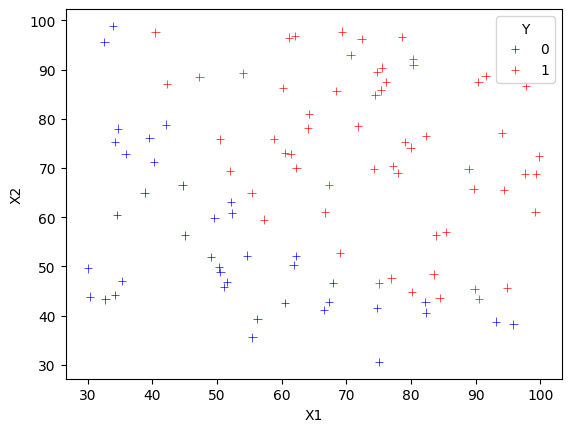

In [20]:
# Load data
df=pd.read_csv('./data/data_exam.txt', sep=' ')
df.head()
dataset = df.rename(columns={df.columns[0]: 'X1',df.columns[1]: 'X2',df.columns[2]: 'Y'})
sns.scatterplot(data=dataset, x='X1', y='X2', hue='Y', marker='+', palette=['blue','red'])

In [21]:
# Learn an AdaBoost classifier
data_train, data_test = train_test_split(dataset, test_size = 0.3, random_state = 6)
aboost = AdaBoostClassifier(n_estimators=5, algorithm="SAMME", random_state=0)
aboost.fit(data_train.loc[:, ['X1', 'X2']], data_train.Y)
aboost.score(data_test.loc[:, ['X1', 'X2']], data_test.Y)

/Users/tomchauvel/Documents/GitHub/2024-2025-ESIR-AA/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


0.9

In [22]:
print("Estimator used to grow the ensemble : ", aboost.estimator_)
print("Weights for each estimator in the boosted ensemble : ", aboost.estimator_weights_)
print("Classification error for each estimator in the boosted ensemble : ", aboost.estimator_errors_)

Estimator used to grow the ensemble :  DecisionTreeClassifier(max_depth=1)
Weights for each estimator in the boosted ensemble :  [1.13707857 1.65542303 1.13867105 1.15706349 0.89933281]
Classification error for each estimator in the boosted ensemble :  [0.24285714 0.16037736 0.24256444 0.23920127 0.28918762]


<font color="red">**Question 1:**</font> 
- What is the weak classifier used here?
- How many iterations are done?

<font color="red">**Question 2:**</font> 
- Remind how the estimator weights are computed? (Give the formula. Be careful, this is the SAMME version)

<font color="blue">**Todo:**</font> Apply the formula to retrieve the estimator weights (at least one).

In [23]:
# TODO - retrieve the estimator weights



In [24]:
def draw_decision_boundaries(model, data):
    h = 0.05
    xx, yy = np.meshgrid(
            np.linspace(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
            np.linspace(data.iloc[:, 1].min(), data.iloc[:, 1].max()))
    zz = np.c_[xx.ravel(), yy.ravel()]
    zz = pd.DataFrame(zz)
    zz2 = zz
    zz2.columns=['X1','X2'] # avoid warning on valid feature names
    pred_zz= pd.Series(model.predict(zz2))
    color_map = matplotlib.colors.ListedColormap(pd.Series(['blue', 'red']))
    fig = plt.figure(figsize=  (8,8))
    fig = plt.scatter(zz.iloc[:,0], zz.iloc[:,1], c = pred_zz, cmap = color_map, marker='+', s=70)
    fig = plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 50, c = data.iloc[:,2], cmap = color_map)

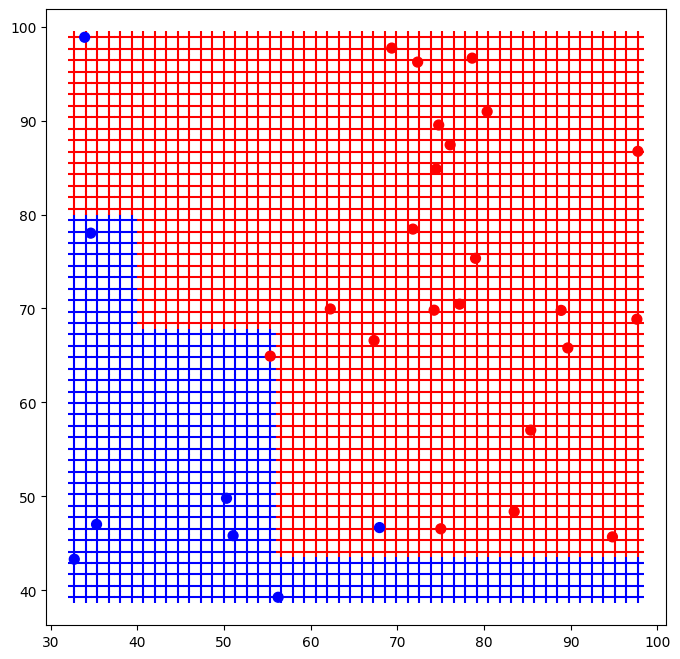

In [25]:
draw_decision_boundaries(aboost,data_test)

<font color="blue">**Todo:**</font> Compare with a decision tree: performances, decision boundaries

In [26]:
# TODO - compare with decision tree and draw the decision boundaries

